In [1]:
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime
import pandas as pd 
import pyarrow

In [2]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [3]:
df = pl.read_csv("covid_19_india.csv", null_values='-')
df

Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
i64,str,str,str,i64,i64,i64,i64,i64
1,"""2020-01-30""","""6:00 PM""","""Kerala""",1,0,0,0,1
2,"""2020-01-31""","""6:00 PM""","""Kerala""",1,0,0,0,1
3,"""2020-02-01""","""6:00 PM""","""Kerala""",2,0,0,0,2
4,"""2020-02-02""","""6:00 PM""","""Kerala""",3,0,0,0,3
5,"""2020-02-03""","""6:00 PM""","""Kerala""",3,0,0,0,3
6,"""2020-02-04""","""6:00 PM""","""Kerala""",3,0,0,0,3
7,"""2020-02-05""","""6:00 PM""","""Kerala""",3,0,0,0,3
8,"""2020-02-06""","""6:00 PM""","""Kerala""",3,0,0,0,3
9,"""2020-02-07""","""6:00 PM""","""Kerala""",3,0,0,0,3


In [4]:
df.null_count()

Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,17664,17664,0,0,0


In [5]:
df.sort('Date', 'Time')
d = {i : [0, 0, 0] for i in df.select(pl.col('State/UnionTerritory').unique()).get_columns()[0].to_list()}
a = [0] * df.shape[0];
b = [0] * df.shape[0];
c = [0] * df.shape[0];
k = 0
for i in df.iter_rows():
    a[k] = i[6] - d[i[3]][0]
    d[i[3]][0] = i[6];
    b[k] = i[7] - d[i[3]][1]
    d[i[3]][1] = i[7];
    c[k] = i[8] - d[i[3]][2]
    d[i[3]][2] = i[8];
    k += 1
df.insert_at_idx(df.shape[1], pl.Series('CuredInc', a))
df.insert_at_idx(df.shape[1], pl.Series('DeathsInc', b))
df.insert_at_idx(df.shape[1], pl.Series('ConfirmedInc', c))
df

Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc
i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64
1,"""2020-01-30""","""6:00 PM""","""Kerala""",1,0,0,0,1,0,0,1
2,"""2020-01-31""","""6:00 PM""","""Kerala""",1,0,0,0,1,0,0,0
3,"""2020-02-01""","""6:00 PM""","""Kerala""",2,0,0,0,2,0,0,1
4,"""2020-02-02""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,1
5,"""2020-02-03""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
6,"""2020-02-04""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
7,"""2020-02-05""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
8,"""2020-02-06""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
9,"""2020-02-07""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0


In [6]:
df.drop(['Sno', 'Time', 'State/UnionTerritory']).describe()

describe,Date,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc
str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""18110""",18110.0,18110.0,18110.0,18110.0,18110.0,18110.0,18110.0,18110.0
"""null_count""","""0""",17664.0,17664.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,12.188341,1.495516,278637.518056,4052.402264,301031.401822,2324.561734,34.340696,2391.895417
"""std""",null,21.582253,3.576292,614890.894424,10919.076411,656148.872965,50212.176835,1017.841542,51979.397483
"""min""","""2020-01-30""",0.0,0.0,0.0,0.0,0.0,-3.0,-1.0,-12265.0
"""max""","""2021-08-11""",177.0,14.0,6.159676e6,134201.0,6.363442e6,6.000911e6,130753.0,6.229596e6
"""median""",null,3.0,0.0,33364.0,588.0,39773.5,176.0,2.0,193.0


In [7]:
df = df.filter((pl.col('CuredInc') < 1e5) & (pl.col('DeathsInc') < 1e5) & (pl.col('ConfirmedInc') < 1e5))
df

Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc
i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64
1,"""2020-01-30""","""6:00 PM""","""Kerala""",1,0,0,0,1,0,0,1
2,"""2020-01-31""","""6:00 PM""","""Kerala""",1,0,0,0,1,0,0,0
3,"""2020-02-01""","""6:00 PM""","""Kerala""",2,0,0,0,2,0,0,1
4,"""2020-02-02""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,1
5,"""2020-02-03""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
6,"""2020-02-04""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
7,"""2020-02-05""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
8,"""2020-02-06""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0
9,"""2020-02-07""","""6:00 PM""","""Kerala""",3,0,0,0,3,0,0,0


In [8]:
df_tl = df.groupby('Date', 'State/UnionTerritory', maintain_order=True).agg(pl.col('Cured', 'Deaths', 'Confirmed').last(), pl.col('CuredInc', 'DeathsInc', 'ConfirmedInc').sum())
df_tl

Date,State/UnionTerritory,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc
str,str,i64,i64,i64,i64,i64,i64
"""2020-01-30""","""Kerala""",0,0,1,0,0,1
"""2020-01-31""","""Kerala""",0,0,1,0,0,0
"""2020-02-01""","""Kerala""",0,0,2,0,0,1
"""2020-02-02""","""Kerala""",0,0,3,0,0,1
"""2020-02-03""","""Kerala""",0,0,3,0,0,0
"""2020-02-04""","""Kerala""",0,0,3,0,0,0
"""2020-02-05""","""Kerala""",0,0,3,0,0,0
"""2020-02-06""","""Kerala""",0,0,3,0,0,0
"""2020-02-07""","""Kerala""",0,0,3,0,0,0


In [9]:
df_tl = df_tl.groupby('Date', maintain_order=True).agg(pl.col('Cured', 'Deaths', 'Confirmed', 'CuredInc', 'DeathsInc', 'ConfirmedInc').sum())
df_tl

Date,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc
str,i64,i64,i64,i64,i64,i64
"""2020-01-30""",0,0,1,0,0,1
"""2020-01-31""",0,0,1,0,0,0
"""2020-02-01""",0,0,2,0,0,1
"""2020-02-02""",0,0,3,0,0,1
"""2020-02-03""",0,0,3,0,0,0
"""2020-02-04""",0,0,3,0,0,0
"""2020-02-05""",0,0,3,0,0,0
"""2020-02-06""",0,0,3,0,0,0
"""2020-02-07""",0,0,3,0,0,0


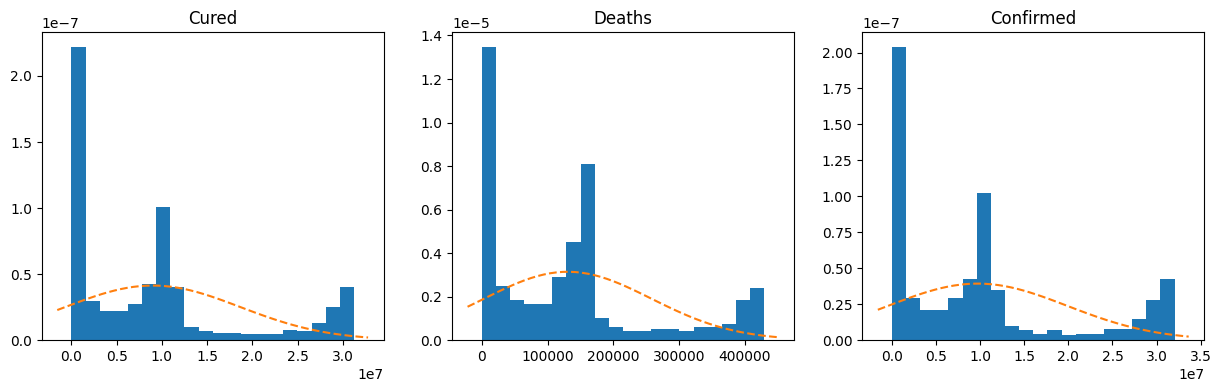

In [10]:
keys1 = ['Cured', 'Deaths', 'Confirmed']

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
axes = axes.flatten()

for key, ax in zip(keys1, axes):
    ax.hist(df_tl[key], density=True, bins=20)
    
    loc = df_tl[key].mean()
    scale = df_tl[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

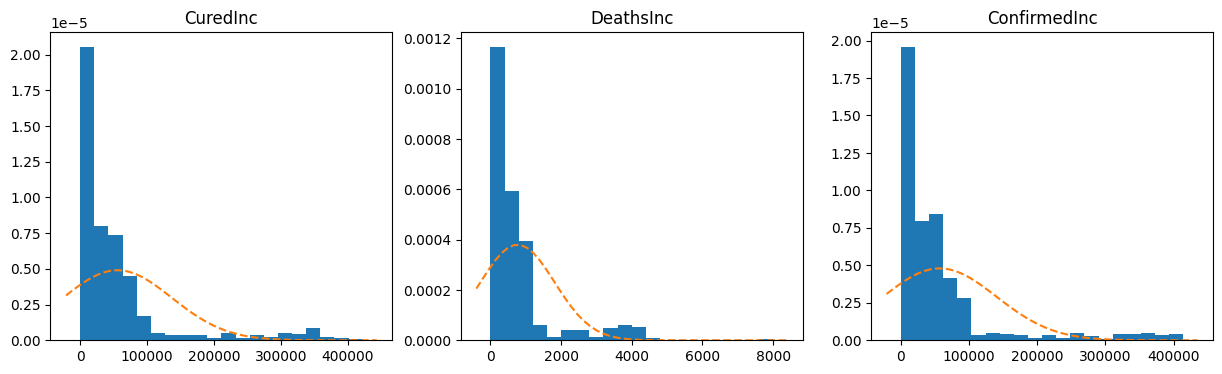

In [11]:
keys2 = ['CuredInc', 'DeathsInc', 'ConfirmedInc']

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
axes = axes.flatten()

for key, ax in zip(keys2, axes):
    ax.hist(df_tl[key], density=True, bins=20)
    
    loc = df_tl[key].mean()
    scale = df_tl[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

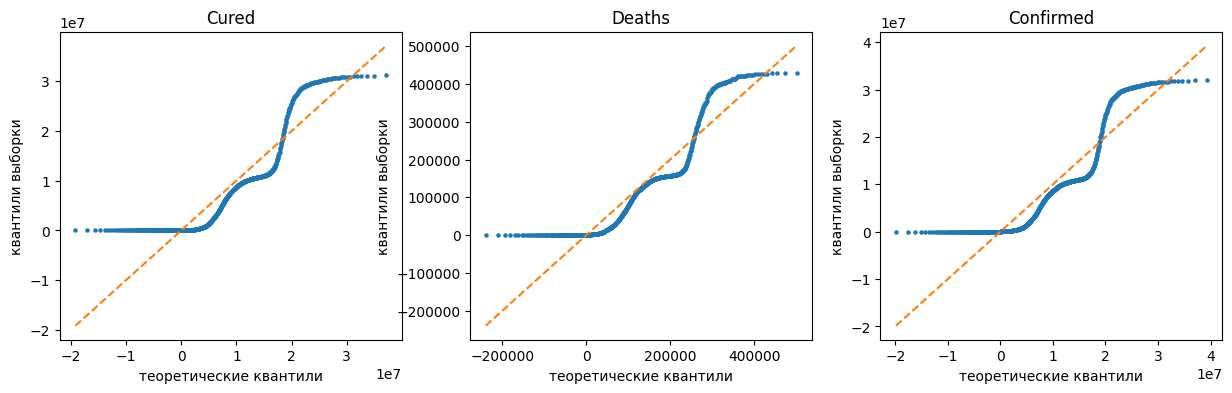

In [12]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
axes = axes.flatten()

for key, ax in zip(keys1, axes):
    samples = df_tl[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

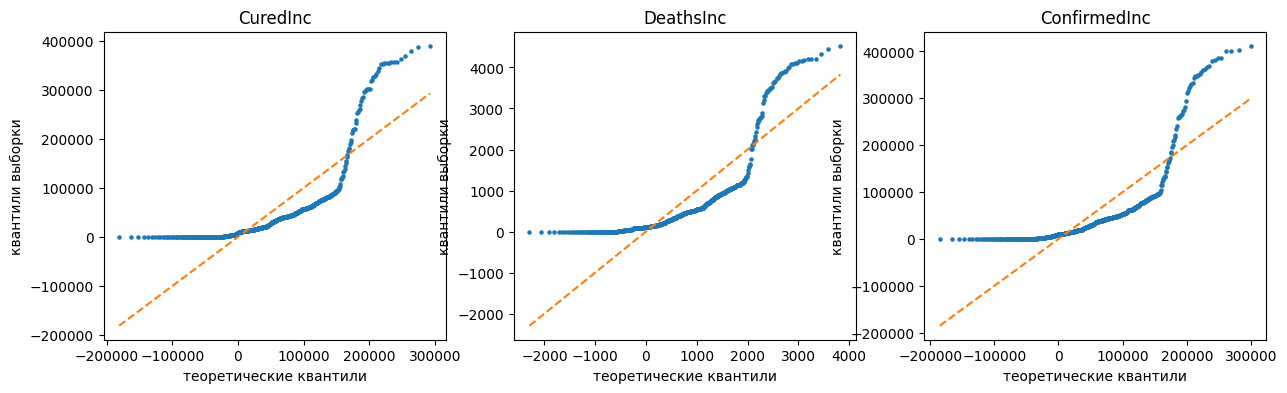

In [13]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 4)
axes = axes.flatten()

for key, ax in zip(keys2, axes):
    samples = df_tl[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [14]:
for key in keys1 + keys2:
    print(key)
    
    samples = df_tl[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Cured
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8321428571428572
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9017857142857143
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Deaths
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6339285714285714
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9071428571428571
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Confirmed
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8196428571428571
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9142857142857143
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

CuredInc
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.9035714285714286
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9303571428571429
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9553571428571429

DeathsInc
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.8910714285714286
2 sigma(s)
	theoretical:	0.9544997361036416
	sampl

In [15]:
df_tl = df_tl.with_columns(pl.col('Date').str.strptime(pl.Datetime, "%Y-%m-%d")).with_columns(pl.col('Date') - datetime(2020,1,30))
df_tl

Date,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc
duration[μs],i64,i64,i64,i64,i64,i64
0µs,0,0,1,0,0,1
1d,0,0,1,0,0,0
2d,0,0,2,0,0,1
3d,0,0,3,0,0,1
4d,0,0,3,0,0,0
5d,0,0,3,0,0,0
6d,0,0,3,0,0,0
7d,0,0,3,0,0,0
8d,0,0,3,0,0,0


In [16]:
df_tl = df_tl.with_columns(pl.col('ConfirmedInc').shift(-14).alias('NewConfirmedInc'))
df_tl

Date,Cured,Deaths,Confirmed,CuredInc,DeathsInc,ConfirmedInc,NewConfirmedInc
duration[μs],i64,i64,i64,i64,i64,i64,i64
0µs,0,0,1,0,0,1,0
1d,0,0,1,0,0,0,0
2d,0,0,2,0,0,1,0
3d,0,0,3,0,0,1,0
4d,0,0,3,0,0,0,0
5d,0,0,3,0,0,0,0
6d,0,0,3,0,0,0,0
7d,0,0,3,0,0,0,0
8d,0,0,3,0,0,0,0


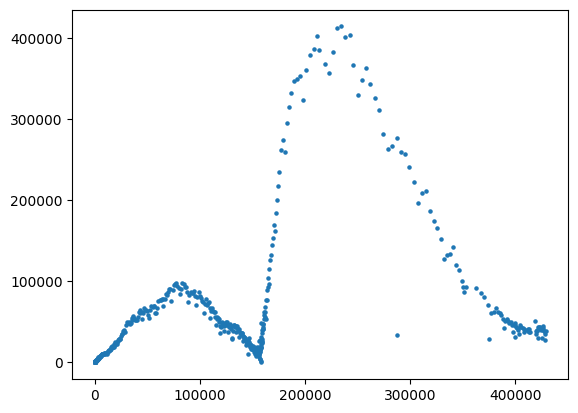

In [17]:
plt.scatter(df_tl['Deaths'], df_tl['ConfirmedInc'], 5)
plt.show()

In [18]:
df_tl_2 = df_tl.filter(pl.col('NewConfirmedInc').is_null() == False)

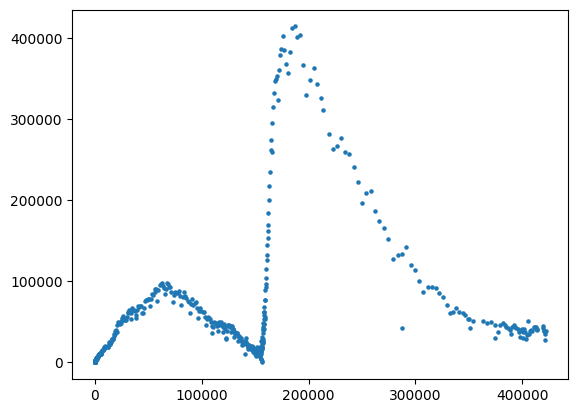

In [19]:
plt.scatter(df_tl_2['Deaths'], df_tl_2['NewConfirmedInc'], 5)
plt.show()

In [20]:
n1 = df_tl.shape[0]
ones = np.ones((n1 ,1))
x_pot = np.hstack((ones, df_tl.get_column('ConfirmedInc').to_numpy().reshape(n1,1)))

In [21]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df_tl['Deaths'])
z = x_pot.dot(b)
e = df_tl['Deaths'] - z

In [22]:
R1 = 1 - sum_of_squares(e) / sum_of_squares(np.array(df_tl['Deaths']))
R1

0.12994039558524462

In [23]:
n2 = df_tl_2.shape[0]
ones = np.ones((n2 ,1))
x_pot = np.hstack((ones, df_tl_2.get_column('NewConfirmedInc').to_numpy().reshape(n2,1)))

In [24]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df_tl_2['Deaths'])
z = x_pot.dot(b)
e = df_tl_2['Deaths'] - z

In [25]:
R2 = 1 - sum_of_squares(e) / sum_of_squares(np.array(df_tl_2['Deaths']))
R2

0.08055751451902904

In [26]:
k1, k2_1, k2_2 = 1, n1 - 2 , n2 - 2

In [27]:
alpha = 0.05

t1, t2 = stats.f.ppf(1 - alpha, k1, k2_1), stats.f.ppf(1 - alpha, k1, k2_2)
t1, t2

(3.858177675634367, 3.858609362637949)

In [28]:
F1 = (R1 / k1) / ((1 - R1) / k2_1)
F2 = (R2 / k1) / ((1 - R2) / k2_2)
F1, F2

(83.3353719316024, 47.662892013769984)

In [29]:
b1 = np.cov(df_tl.get_column('Deaths').to_numpy(), df_tl.get_column('ConfirmedInc').to_numpy(), ddof=1)[0, 1] / np.var(df_tl.get_column('Deaths').to_numpy(), ddof=1)
b0 = df_tl['ConfirmedInc'].mean() - b1 * df_tl['Deaths'].mean()

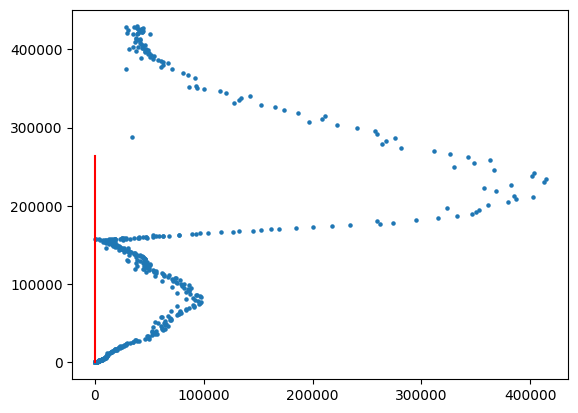

In [30]:
plt.scatter(df_tl['ConfirmedInc'], df_tl['Deaths'], 5)
x = np.linspace(0, 10, 1000)
y = b0*x + b1
plt.plot(x, y, color = 'r')
plt.show()

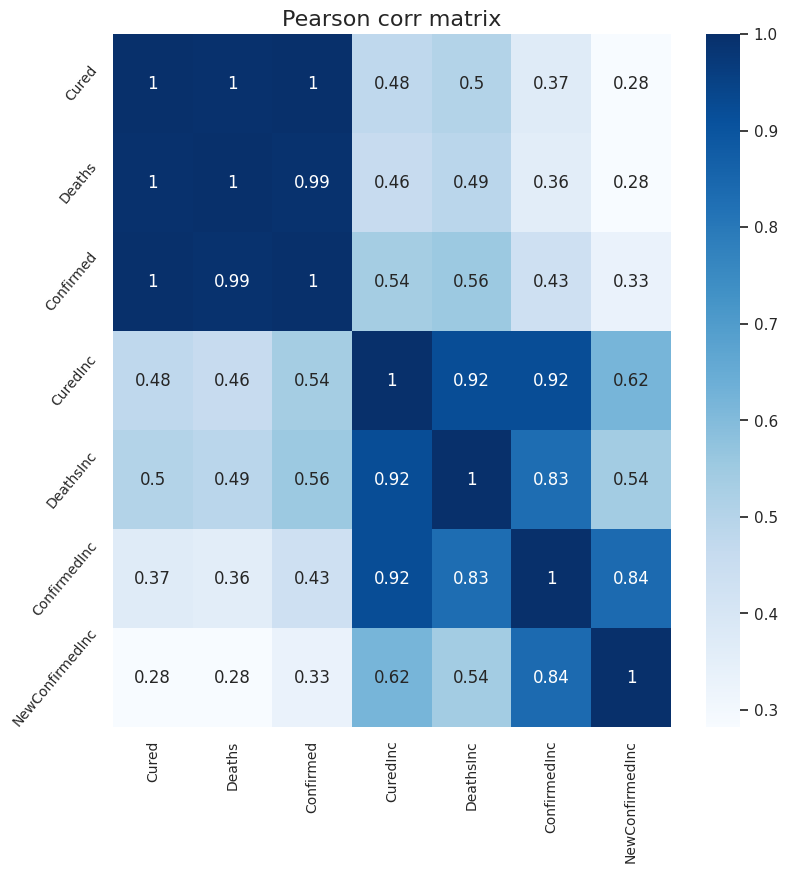

In [31]:

sns.set(rc={'figure.figsize':(9, 9)})
sns.heatmap(df_tl.to_pandas().corr(numeric_only=True), annot=True, cmap="Blues")
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=50)
plt.title("Pearson corr matrix", fontsize=16)
plt.show()